In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
 fp = "tl_2017_47_tabblock10.shp"

In [3]:
data = gpd.read_file(fp)

In [4]:
type(data)

geopandas.geodataframe.GeoDataFrame

In [5]:
data.head()

,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,NAME10,MTFCC10,UR10,UACE10,UATYPE,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,47,013,951000,2042,470139510002042,Block 2042,G5040,R,None,None,S,0,110374,+36.3045648,-084.0468708,"POLYGON ((-84.05356 36.30550, -84.05329 36.305..."
1,47,115,050201,3033,471150502013033,Block 3033,G5040,R,None,None,S,0,1291525,+35.0380611,-085.5405940,"POLYGON ((-85.54533 35.02853, -85.54516 35.028..."
2,47,115,050201,3095,471150502013095,Block 3095,G5040,R,None,None,S,0,28082,+35.0170975,-085.5402844,"POLYGON ((-85.54208 35.01662, -85.54143 35.016..."
3,47,115,050201,3016,471150502013016,Block 3016,G5040,R,None,None,S,0,210338,+35.0404346,-085.4288158,"POLYGON ((-85.43117 35.04427, -85.43113 35.044..."
4,47,011,011202,1015,470110112021015,Block 1015,G5040,R,None,None,S,0,3031,+35.3159806,-084.7992263,"POLYGON ((-84.79980 35.31592, -84.79968 35.315..."


In [6]:
data["GEOID10"] = pd.to_numeric(data["GEOID10"])

In [7]:
fcc_477_all = pd.read_csv('fcc_filtered_all.csv')

In [8]:
fcc_477_geo=fcc_477_all[fcc_477_all['State'] == 'TN'] 

In [9]:
fcc_477_geo.head()

,Unnamed: 0,Provider ID,FRN,Provider Name,State,Census Block FIPS Code,Technology Code,Max Advertised Downstream Speed (mbps),Max Advertised Upstream Speed (mbps)
36514,14440893,43491,13709282,Morristown Utility,TN,470631001001000,50,1000.0,1000.0
36515,14440894,43491,13709282,Morristown Utility,TN,470631001001001,50,1000.0,1000.0
36516,14440895,43491,13709282,Morristown Utility,TN,470631001001002,50,1000.0,1000.0
36517,14440896,43491,13709282,Morristown Utility,TN,470631001001003,50,1000.0,1000.0
36518,14440897,43491,13709282,Morristown Utility,TN,470631001001004,50,1000.0,1000.0


In [17]:
tn_geo = pd.merge(data,fcc_477_geo,left_on='GEOID10',right_on='Census Block FIPS Code')

In [18]:
tn_geo.head()

,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,NAME10,MTFCC10,UR10,UACE10,UATYPE,...,geometry,Unnamed: 0,Provider ID,FRN,Provider Name,State,Census Block FIPS Code,Technology Code,Max Advertised Downstream Speed (mbps),Max Advertised Upstream Speed (mbps)
0,47,115,050201,3033,471150502013033,Block 3033,G5040,R,None,None,...,"POLYGON ((-85.54533 35.02853, -85.54516 35.028...",42493623,48032,25646373,"Charter Communications, Inc.",TN,471150502013033,43,940.0,35.0
1,47,115,050201,3095,471150502013095,Block 3095,G5040,R,None,None,...,"POLYGON ((-85.54208 35.01662, -85.54143 35.016...",42493519,48032,25646373,"Charter Communications, Inc.",TN,471150502013095,43,940.0,35.0
2,47,115,050302,1081,471150503021081,Block 1081,G5040,R,None,None,...,"POLYGON ((-85.84409 35.22510, -85.84405 35.225...",42493040,48032,25646373,"Charter Communications, Inc.",TN,471150503021081,43,940.0,35.0
3,47,043,060501,4016,470430605014016,Block 4016,G5040,R,None,None,...,"POLYGON ((-87.36225 36.11004, -87.36220 36.110...",36085435,45995,3768165,"COMCAST CABLE COMMUNICATIONS, LLC",TN,470430605014016,43,987.0,35.0
4,47,043,060501,4016,470430605014016,Block 4016,G5040,R,None,None,...,"POLYGON ((-87.36225 36.11004, -87.36220 36.110...",50452352,52838,1857952,"BellSouth Telecommunications, Inc.",TN,470430605014016,12,25.0,5.0


In [19]:
tn_geo = tn_geo.drop(['NAME10','MTFCC10','UR10','UATYPE','Unnamed: 0',],axis=1)

In [20]:
tn_geo.head()

,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,UACE10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry,Provider ID,FRN,Provider Name,State,Census Block FIPS Code,Technology Code,Max Advertised Downstream Speed (mbps),Max Advertised Upstream Speed (mbps)
0,47,115,050201,3033,471150502013033,None,S,0,1291525,+35.0380611,-085.5405940,"POLYGON ((-85.54533 35.02853, -85.54516 35.028...",48032,25646373,"Charter Communications, Inc.",TN,471150502013033,43,940.0,35.0
1,47,115,050201,3095,471150502013095,None,S,0,28082,+35.0170975,-085.5402844,"POLYGON ((-85.54208 35.01662, -85.54143 35.016...",48032,25646373,"Charter Communications, Inc.",TN,471150502013095,43,940.0,35.0
2,47,115,050302,1081,471150503021081,None,S,0,8363,+35.2248646,-085.8432029,"POLYGON ((-85.84409 35.22510, -85.84405 35.225...",48032,25646373,"Charter Communications, Inc.",TN,471150503021081,43,940.0,35.0
3,47,043,060501,4016,470430605014016,None,S,1979807,3681,+36.1152407,-087.3464997,"POLYGON ((-87.36225 36.11004, -87.36220 36.110...",45995,3768165,"COMCAST CABLE COMMUNICATIONS, LLC",TN,470430605014016,43,987.0,35.0
4,47,043,060501,4016,470430605014016,None,S,1979807,3681,+36.1152407,-087.3464997,"POLYGON ((-87.36225 36.11004, -87.36220 36.110...",52838,1857952,"BellSouth Telecommunications, Inc.",TN,470430605014016,12,25.0,5.0


In [21]:
tn_geo = tn_geo.drop(['UACE10','FUNCSTAT10','ALAND10','AWATER10'],axis=1)

In [22]:
tn_geo=tn_geo[tn_geo['State'] == 'TN'] 


In [23]:
tn_geo.to_csv('tn_geo.csv')

,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,INTPTLAT10,INTPTLON10,geometry,Provider ID,FRN,Provider Name,State,Census Block FIPS Code,Technology Code,Max Advertised Downstream Speed (mbps),Max Advertised Upstream Speed (mbps)
0,47,115,050201,3033,471150502013033,+35.0380611,-085.5405940,"POLYGON ((-85.54533 35.02853, -85.54516 35.028...",48032,25646373,"Charter Communications, Inc.",TN,471150502013033,43,940.0,35.0
1,47,115,050201,3095,471150502013095,+35.0170975,-085.5402844,"POLYGON ((-85.54208 35.01662, -85.54143 35.016...",48032,25646373,"Charter Communications, Inc.",TN,471150502013095,43,940.0,35.0
2,47,115,050302,1081,471150503021081,+35.2248646,-085.8432029,"POLYGON ((-85.84409 35.22510, -85.84405 35.225...",48032,25646373,"Charter Communications, Inc.",TN,471150503021081,43,940.0,35.0
3,47,043,060501,4016,470430605014016,+36.1152407,-087.3464997,"POLYGON ((-87.36225 36.11004, -87.36220 36.110...",45995,3768165,"COMCAST CABLE COMMUNICATIONS, LLC",TN,470430605014016,43,987.0,35.0
4,47,043,060501,4016,470430605014016,+36.1152407,-087.3464997,"POLYGON ((-87.36225 36.11004, -87.36220 36.110...",52838,1857952,"BellSouth Telecommunications, Inc.",TN,470430605014016,12,25.0,5.0


In [28]:
tn_geo = tn_geo.drop(['STATEFP10','COUNTYFP10','BLOCKCE10','FRN'],axis=1)

In [31]:
tn_geo.to_csv('tn_geo.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BDB0173908>]],
      dtype=object)

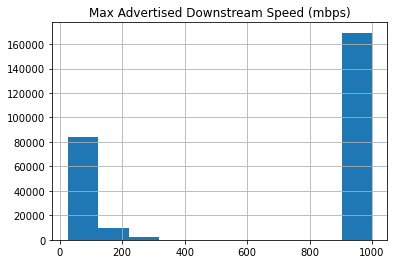

In [32]:
tn_geo.hist(column='Max Advertised Downstream Speed (mbps)')